In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filepath= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
from sklearn.linear_model import LinearRegression # Load module for linear regression

In [6]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [7]:
# highway-mpg to predict car price
X = df[['highway-mpg']]
Y = df['price']

In [8]:
lm.fit(X,Y)

LinearRegression()

In [9]:
# output a prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
# value of the intercept (a)
lm.intercept_

38423.3058581574

In [11]:
# value of the slope (b)
lm.coef_

array([-821.73337832])

In [12]:
 # linear regression object called "lm1"
lm1 = LinearRegression()
lm1

LinearRegression()

In [13]:
# Trainning the model using "engine-size" as the independent variable and "price" as the dependent variable
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [14]:
# Slope
lm1.coef_

array([[166.86001569]])

In [15]:
# Intercept
lm1.intercept_

array([-7963.33890628])

In [16]:
# using X and Y
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

Multiple linear regression

In [17]:
# develop a model using these variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
lm.fit(Z, df['price'])

LinearRegression()

In [19]:
lm.intercept_

-15806.62462632922

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [21]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [22]:
lm2.coef_

array([   1.49789586, -820.45434016])

Model Evaluation and Visualization

In [1]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

(0.0, 48154.06824110594)

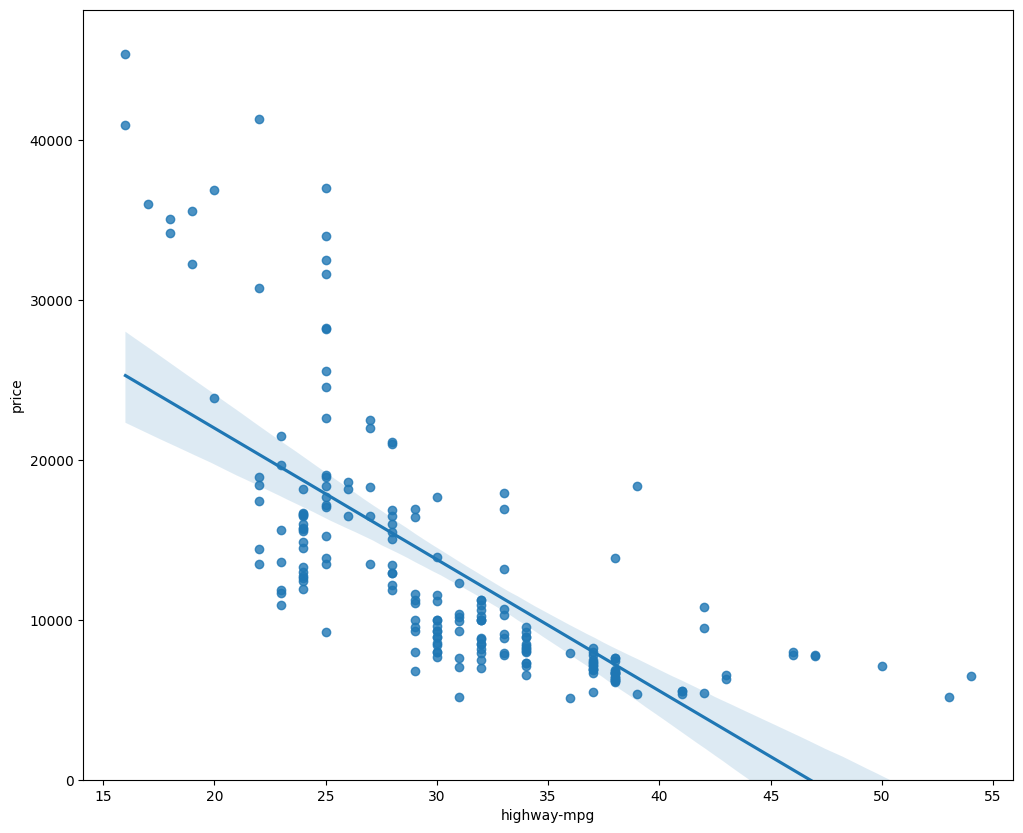

In [23]:
#  visualize highway-mpg as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

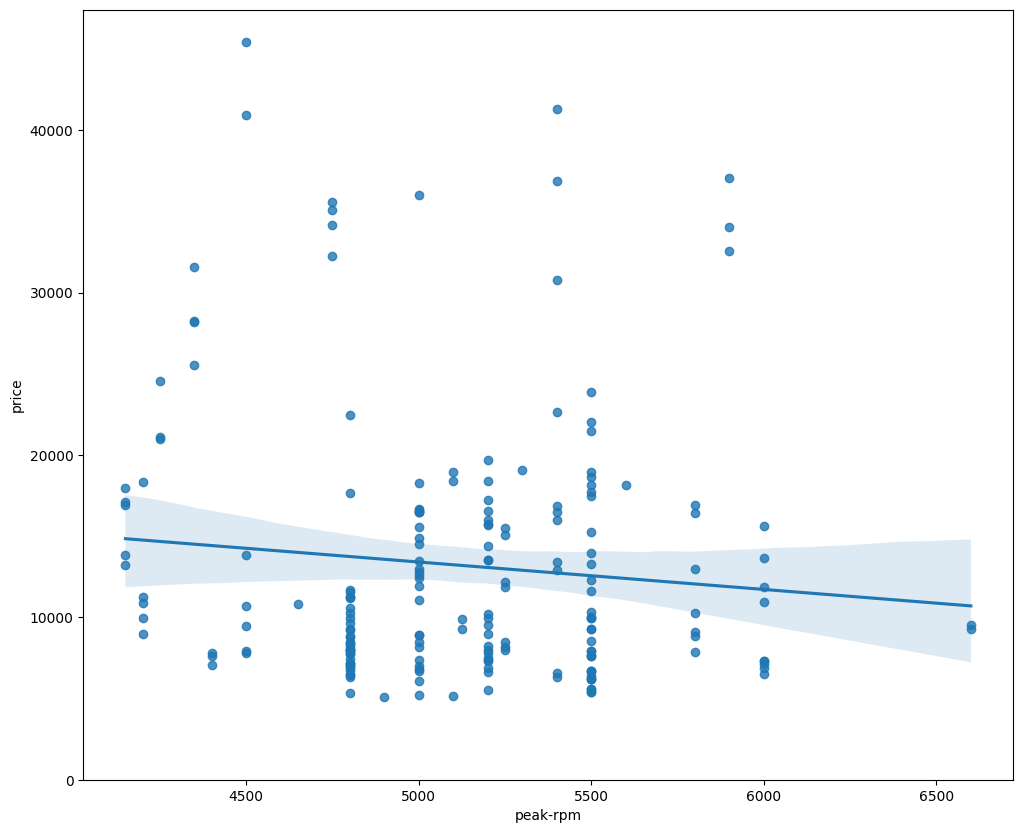

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [25]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


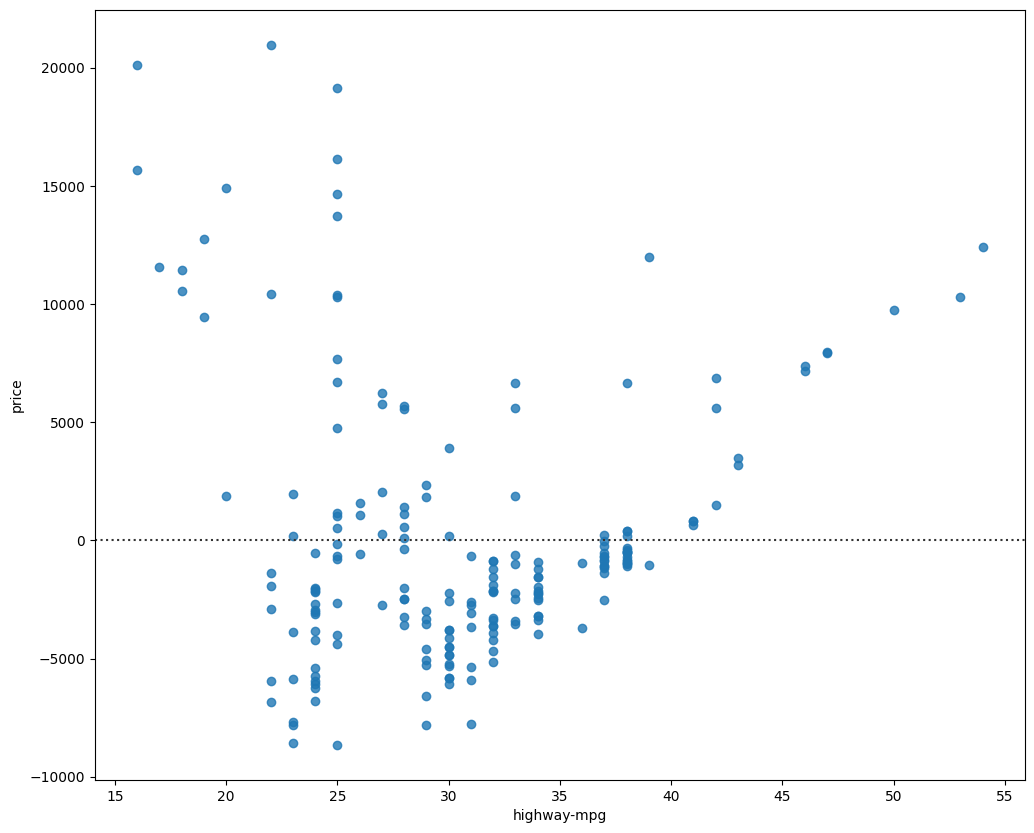

In [26]:
# Residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [27]:
Y_hat = lm.predict(Z) # visualizing multiple regression

<ipython-input-28-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-28-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

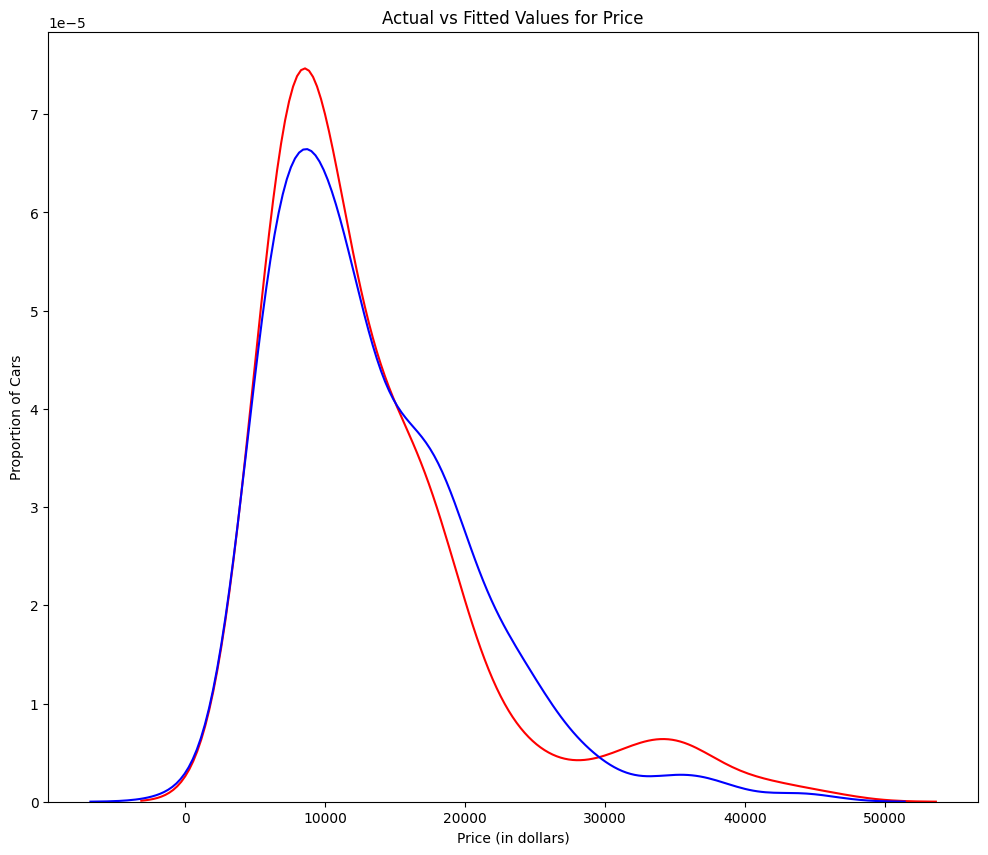

In [28]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Polynomial Regression and Pipeline

In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [30]:
x = df['highway-mpg']
y = df['price']

In [31]:
# Use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


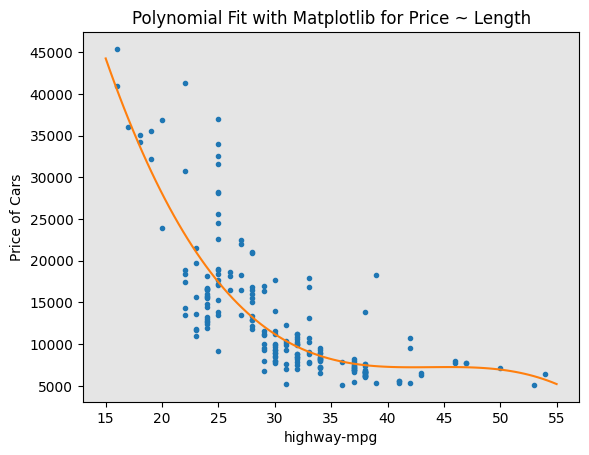

In [32]:
PlotPolly(p, x, y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


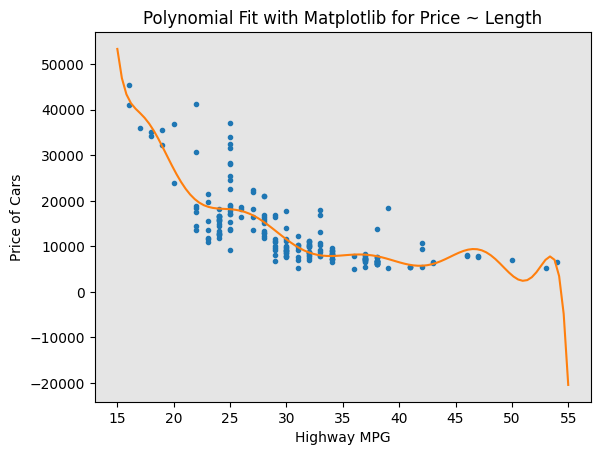

In [34]:
# Use a polynomial of the 11rd order (cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [42]:
Z_pr=pr.fit_transform(Z)

In [43]:
Z.shape

(201, 4)

In [44]:
Z_pr.shape

(201, 15)

Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
# create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
#  input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

In [ ]:
# normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

In [49]:
# normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [50]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

###Measures for In-Sample Evaluation

Model 1: Simple Linear Regression

In [51]:
# calculate the R^2:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [52]:
# calculate the MSE
# predict the output i.e., "yhat" using the predict method, where X is the input variable
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [53]:
# import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

In [54]:
# compare the predicted results with the actual results:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [55]:
# calculate the R^2:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [56]:
# calculate the MSE.
# produce a prediction
Y_predict_multifit = lm.predict(Z)

In [57]:
# compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [58]:
# calculate the R^2.
# import the function r2_score from the module metrics as we are using a different function.
from sklearn.metrics import r2_score

In [59]:
# apply the function to get the value of R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [60]:
# calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.426361218

###Prediction and Decision Making

Prediction

In [61]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [62]:
# Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
# Fit the model
lm.fit(X, Y)
lm

In [ ]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

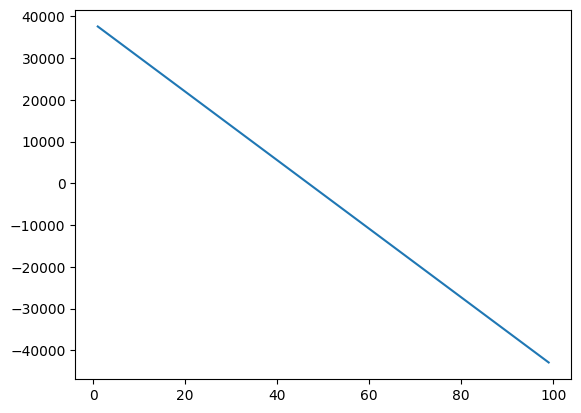

In [65]:
# plot the data
plt.plot(new_input, yhat)
plt.show()